# Tutorial 3 - Basic plotting

In [Tutorial 2](./Tutorial%202%20-%20Compare%20models.ipynb), we made use of PyBaMM's automatic plotting function when comparing models. This gave a good quick overview of many of the key variables in the model. However, by passing in just a few arguments it is easy to plot any of the many other variables that may be of interest to you. We start by building and solving a model as before:

In [1]:
# magic lines that avoid re-start
%load_ext autoreload
%autoreload 2

In [14]:
#%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import matplotlib.pyplot as plt

model_dfn = pybamm.lithium_ion.DFN(options={"contact resistance": "true",
})
param = pybamm.ParameterValues("OKane2023")
sim_dfn = pybamm.Simulation(model_dfn, parameter_values=param,)
sim_dfn.solve([0, 3600])

At t = 335.556 and h = 9.51726e-17, the corrector convergence failed repeatedly or with |h| = hmin.


We now want to plot a selection of the model variables. To see a full list of the available variables just type:

In [3]:
model_dfn.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


There are a _lot_ of variables. You can also search the list of variables for a particular string (e.g. "electrolyte")

In [4]:
model_dfn.variables.search("electrolyte")

Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte concentration concatenation [mol.m-3]
Electrolyte convection flux [mol.m-2.s-1]
Electrolyte current density [A.m-2]
Electrolyte diffusion flux [mol.m-2.s-1]
Electrolyte flux [mol.m-2.s-1]
Electrolyte migration flux [mol.m-2.s-1]
Electrolyte potential [V]
Electrolyte transport efficiency
Gradient of electrolyte potential [V.m-1]
Gradient of negative electrolyte potential [V.m-1]
Gradient of positive electrolyte potential [V.m-1]
Gradient of separator electrolyte potential [V.m-1]
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential [V]
Negative electrolyte transport efficiency
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electrolyte potential [V]
Positive electrolyte transport efficiency
Separator electrolyte concentration [Molar]
Separat

We have tried to make variables names fairly self explanatory.

As a first example, we choose to plot the voltage. We add this to a list and then pass this list to the `plot` method of our simulation:

In [5]:
output_variables = ["Voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Alternatively, we may be interested in plotting both the electrolyte concentration and the voltage. In which case, we would do:

In [6]:
output_variables = ["Electrolyte concentration [mol.m-3]", "Voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

You can also plot multiple variables on the same plot by nesting lists

In [7]:
sim_dfn.plot([["Electrode current density [A.m-2]", "Electrolyte current density [A.m-2]"], "Voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [8]:
sim_dfn.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

For plotting the voltage components you can use the `plot_votage_components` function

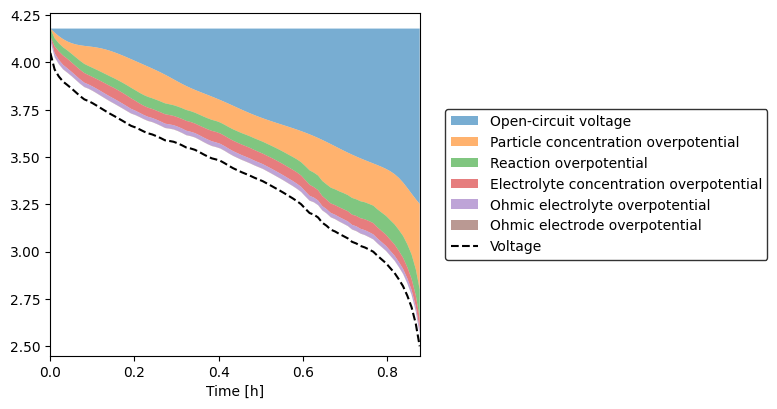

(<Figure size 800x400 with 1 Axes>, <AxesSubplot: xlabel='Time [h]'>)

In [15]:
pybamm.plot_voltage_components(sim_dfn.solution)

And with a few modifications (by creating subplots and by providing the axes on which the voltage components have to be plotted), it can also be used to compare the voltage components of different simulations

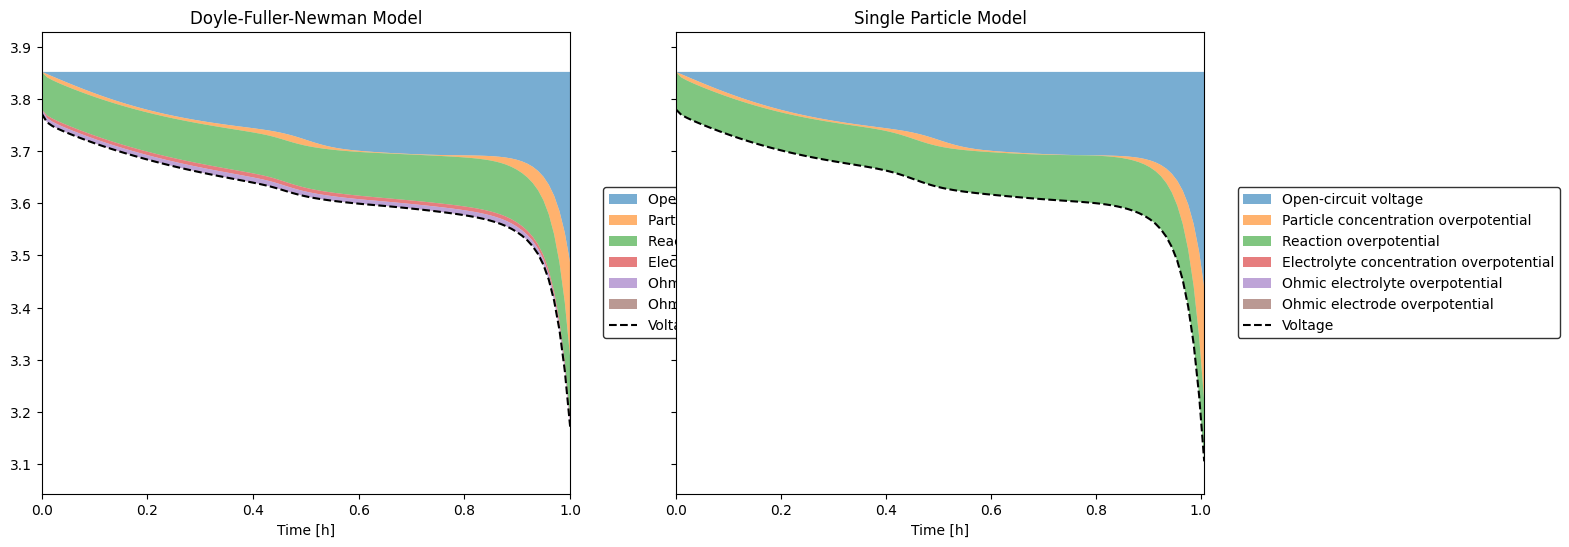

In [10]:
# simulating and solving Single Particle Model
model_spm = pybamm.lithium_ion.SPM()
sim_spm = pybamm.Simulation(model_spm)
sim_spm.solve([0, 3700])

# comparing voltage components for Doyle-Fuller-Newman model and Single Particle Model
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

pybamm.plot_voltage_components(sim_dfn.solution, ax=axes.flat[0])
pybamm.plot_voltage_components(sim_spm.solution, ax=axes.flat[1])

axes.flat[0].set_title("Doyle-Fuller-Newman Model")
axes.flat[1].set_title("Single Particle Model")

plt.show()

In this tutorial we have seen how to use the plotting functionality in PyBaMM.

In [Tutorial 4](./Tutorial%204%20-%20Setting%20parameter%20values.ipynb) we show how to change parameter values.

## References

The relevant papers for this notebook are:

In [11]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/